In [20]:
import os
from collections import defaultdict
import numpy as np # linear algebras
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm_notebook as tqdm

data_path = '/home/nvme/data/openimg/'
os.listdir(data_path)

['~', 'train', 'val', 'test', 'sample_submission.csv', 'vehicle.zip']

In [21]:
root = data_path + 'train/'
data = []
for category in sorted(os.listdir(root)):
    for file in sorted(os.listdir(os.path.join(root, category))):
        data.append((category, os.path.join(root, category,  file)))

df = pd.DataFrame(data, columns=['class', 'file_path'])

In [22]:
df.head()

,class,file_path
0,Ambulance,/home/nvme/data/openimg/train/Ambulance/000040...
1,Ambulance,/home/nvme/data/openimg/train/Ambulance/000050...
2,Ambulance,/home/nvme/data/openimg/train/Ambulance/000052...
3,Ambulance,/home/nvme/data/openimg/train/Ambulance/000057...
4,Ambulance,/home/nvme/data/openimg/train/Ambulance/000067...


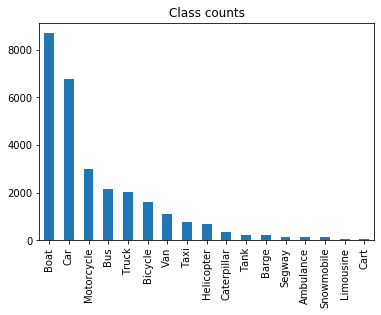

In [23]:
df['class'].value_counts().plot(kind='bar');
plt.title('Class counts');

In [16]:
df['class'].value_counts()

Boat           8695
Car            6781
Motorcycle     2986
Bus            2133
Truck          2033
Bicycle        1618
Van            1111
Taxi            748
Helicopter      668
Caterpillar     331
Tank            206
Barge           202
Segway          153
Ambulance       132
Snowmobile      123
Limousine        74
Cart             51
Name: class, dtype: int64

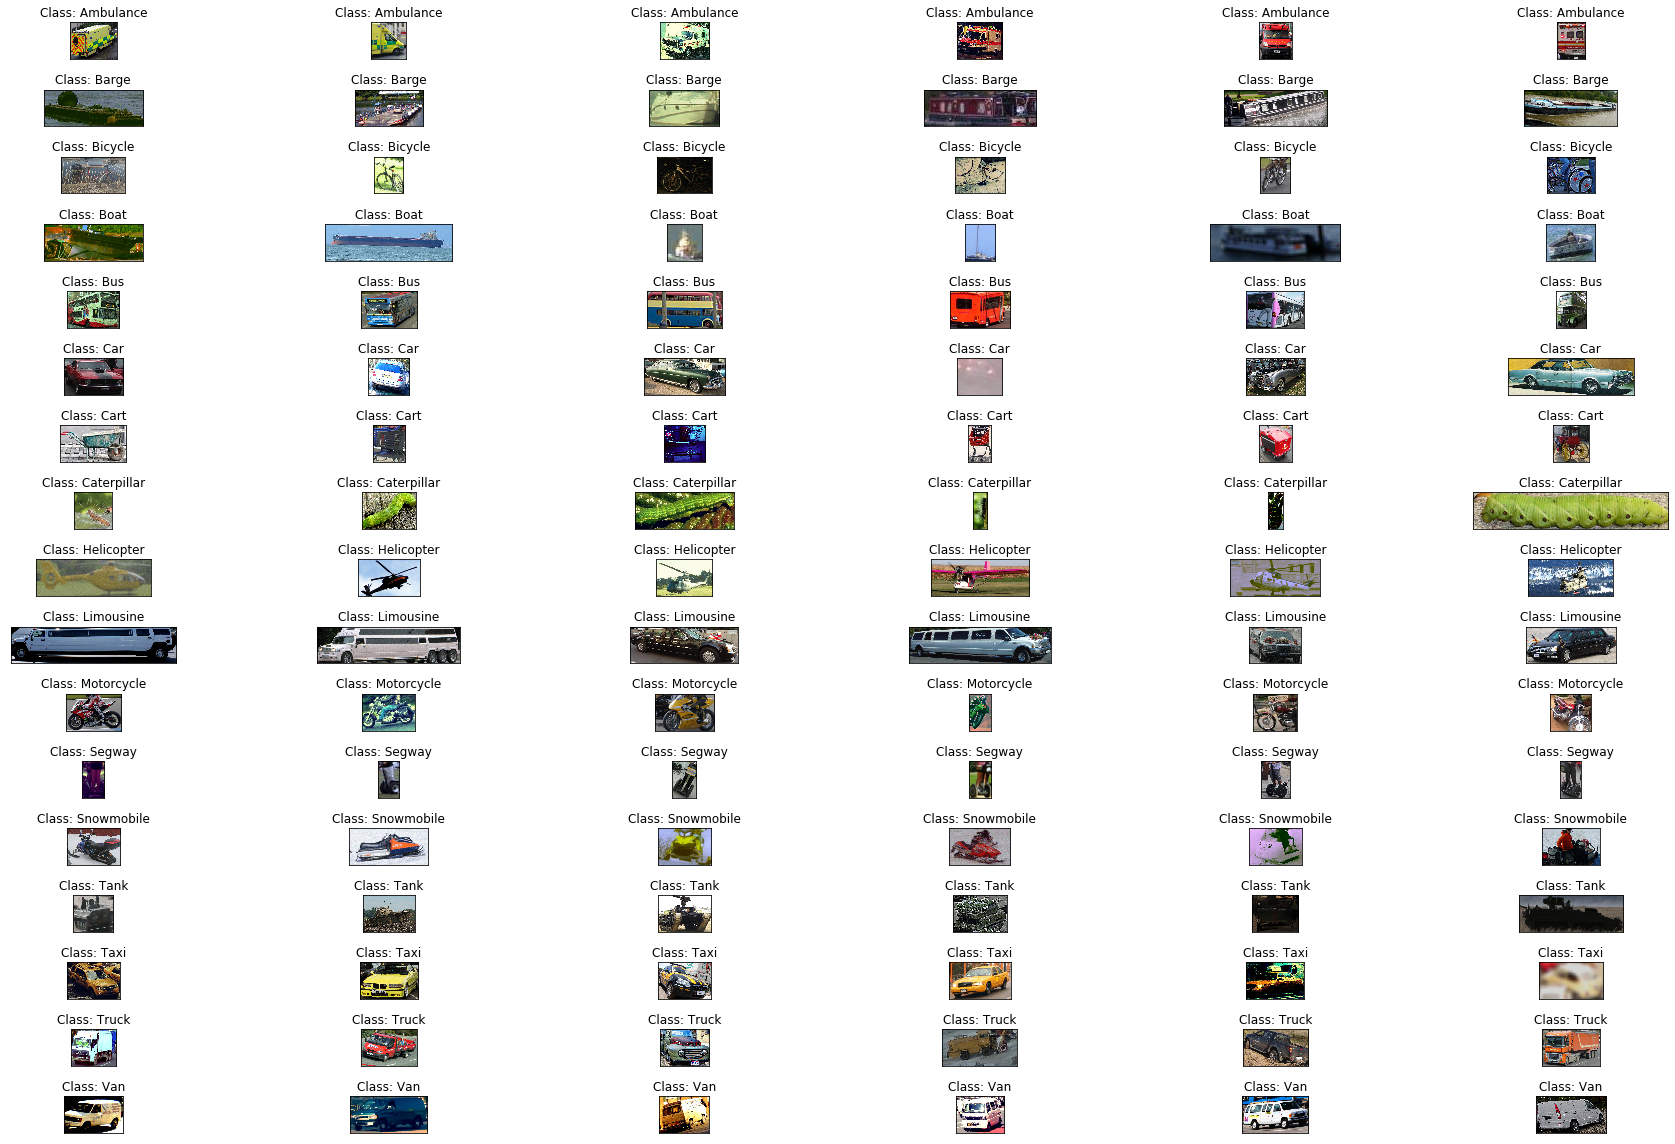

In [17]:
fig = plt.figure(figsize=(25, 16))
for num, category in enumerate(sorted(df['class'].unique())):
    for i, (idx, row) in enumerate(df.loc[df['class'] == category].sample(6).iterrows()):
        ax = fig.add_subplot(17, 6, num * 6 + i + 1, xticks=[], yticks=[])
        im = Image.open(row['file_path'])
        plt.imshow(im)
        ax.set_title(f'Class: {category}')
fig.tight_layout()
plt.show()